<p>REMY Jean-Baptiste</p>
<p>BEAUDET Robin</p>


# <center> Prediction de crimes - MODELS</center>



In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [3]:
pd.set_option('max_rows',200)
pd.set_option('max_columns',100)

In [4]:
Month = ["%d/%d" % (i%12+1,6+i//12) for i in range(0,129)]

In [5]:
df = pd.read_csv('C:\\Users\\Jean-Baptiste\\Desktop\\Time_serie.csv', index_col=0)
df = df.drop([130,131],axis=0)
df.head()

,Other Assaults,All Other Offenses,Assault,Theft,Burglary,Order,Arson,Fraud,Robbery,Vagrancy/Loitering,Rape,Other Sex Offenses (Not Commercialized),Homicide,Crimes,Mining_Logging_Construction,Manufacturing,Trade_Transportation_Utilities,Information,Financial_Activities,Professional_and_Business_Services,Education_and_Health_Services,Leisure_and_Hospitality,Other_Services,Government,Labor Force,Employment,Unemployment,Unemployment Rate
0,2173,4295,2895,3696,908,2204,44,1924,890,55,96,154,25,19359,11800,30400,88400,12700,47700,82600,182800,54500,28100,113900,608659,568770,39889,6.6
1,1853,3430,2395,2999,674,1966,40,1607,659,46,61,142,22,15894,12000,30400,87400,13300,47600,83100,191000,55000,28100,115100,609180,570129,39051,6.4
2,2459,3706,3025,3551,842,2225,51,1698,776,51,78,131,34,18627,12100,30400,87800,12600,47400,83000,188000,55900,28300,115200,609354,571811,37543,6.2
3,2343,4422,2904,3447,781,2184,55,1672,816,43,92,143,38,18940,12300,30400,87900,12700,47500,83600,190900,58100,28400,116300,610997,575352,35645,5.8
4,2500,3734,3389,4138,1001,2091,68,1892,907,38,87,165,31,20041,13500,30300,88400,12900,47600,83500,187600,59000,28500,115600,613592,575646,37946,6.2


In [6]:
df['Crimes'] = df.Crimes - df.Arson - df.Fraud - df['Vagrancy/Loitering'] - df.Rape - df['Other Sex Offenses (Not Commercialized)']

C:\Users\Jean-Baptiste\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


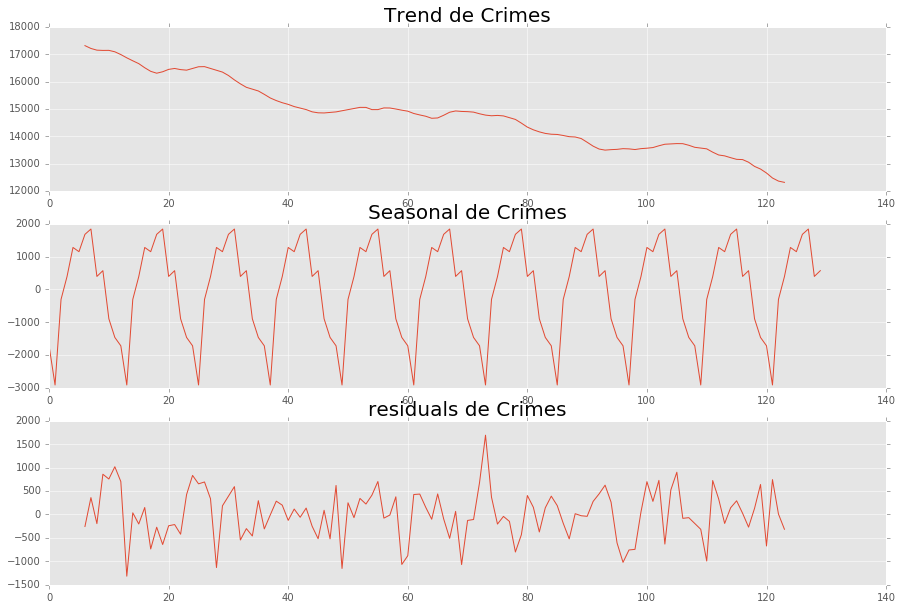

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.array(df.Crimes),freq=12)

df['trend'] =  decomposition.trend
df['seasonal'] =  decomposition.seasonal
df['residuals'] =  decomposition.resid

fig,ax = plt.subplots(3,1,figsize=(15,10))
ax[0].plot(df.trend)
ax[0].set_title('Trend de Crimes', color = 'k', fontsize = 20)
ax[1].plot(df.seasonal)
ax[1].set_title('Seasonal de Crimes', color = 'k', fontsize = 20)
ax[2].plot(df.residuals)
ax[2].set_title('residuals de Crimes', color = 'k', fontsize = 20)

## Model ARIMA

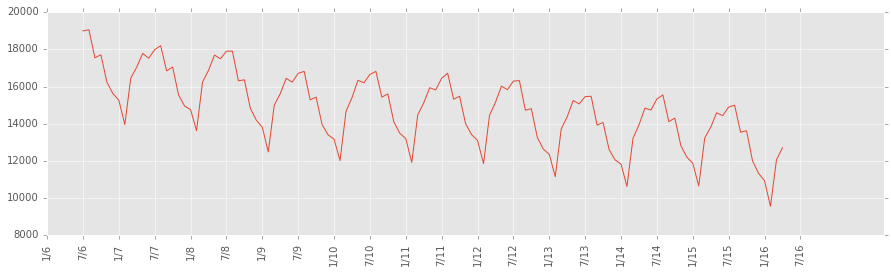

In [8]:
plt.figure(figsize=(15,4))
plt.plot(df.trend+df.seasonal)
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');

In [9]:
df['Crimes_clean'] = df.trend+df.seasonal
df['Crimes_clean_Diff_1'] = df.Crimes_clean.diff(periods=1)
df.Crimes_clean_Diff_1.dropna(inplace = True)

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf  

In [11]:
np.shape(np.array(df.Crimes_clean_Diff_1))

(117,)

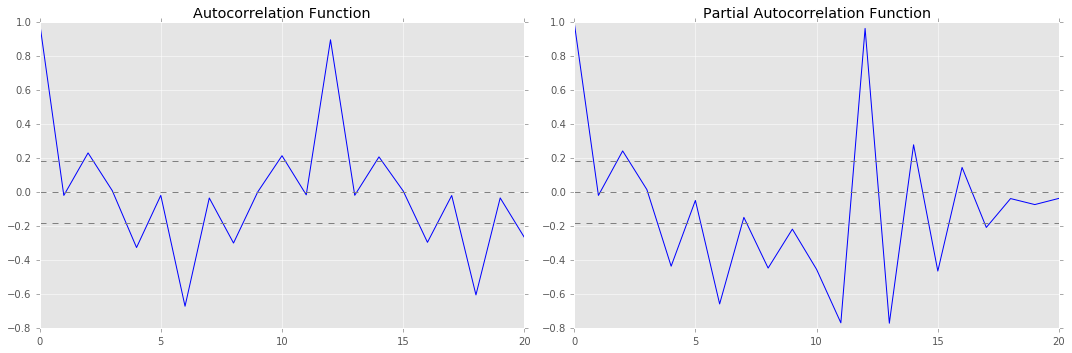

In [12]:
ts_diff = np.array(df.Crimes_clean_Diff_1)

lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

plt.figure(figsize=(15,5))
#Plot ACF:    
plt.subplot(121)
plt.plot(lag_acf,'b')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf,'b')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [99]:
ts = np.array(df.Crimes_clean.astype(float))[6:124]

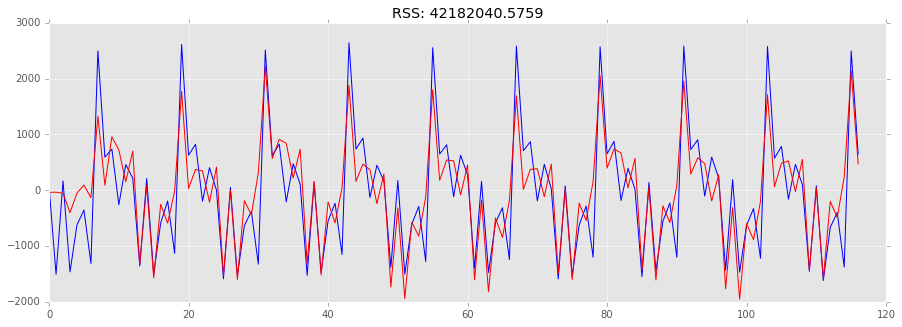

In [14]:
#AR model:
model = ARIMA(ts, order=(10, 1, 0))  
results_AR = model.fit(disp=-1)
plt.figure(figsize=(15,5))
plt.plot(ts_diff,color='b')
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_diff)**2))

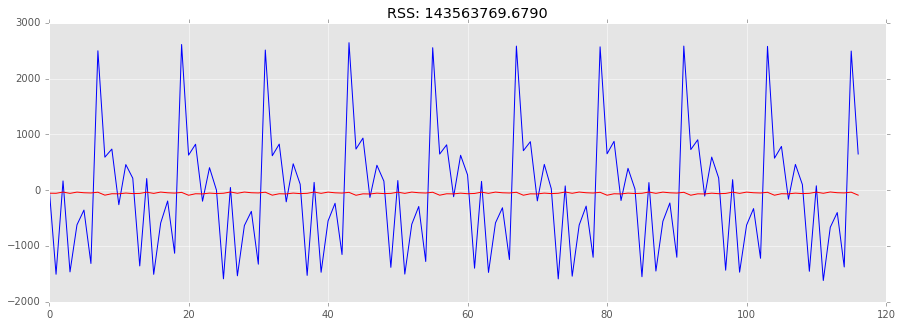

In [15]:
#MA model:
model = ARIMA(ts, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)
plt.figure(figsize=(15,5))
plt.plot(ts_diff,color='b')
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_diff)**2))

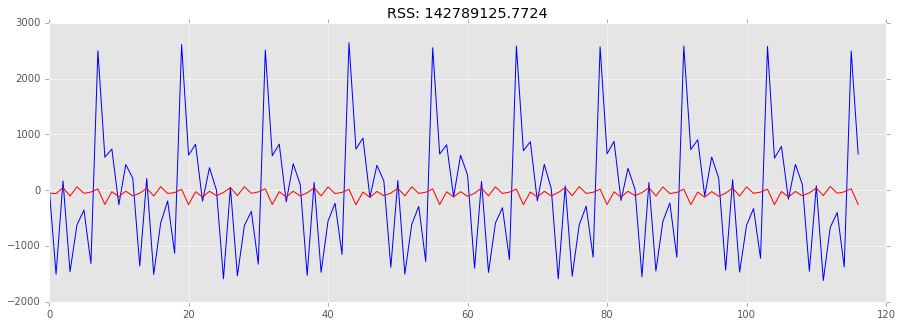

In [16]:
#Combined model:
model = ARIMA(ts, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1) 
plt.figure(figsize=(15,5))
plt.plot(ts_diff,color='b')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_diff)**2))

Essayons une prediction

In [102]:
model = ARIMA(ts, order=(9, 1, 0))  
results = model.fit(disp =-1) 

In [103]:
pred = results.predict(start=104, end = 117, dynamic=True)
pred

array([ 1408.93324011,   167.54961826,  1323.52480608,   572.88729778,
          75.28133139,   746.79800544, -1167.15200922,  -111.44614133,
       -1310.9790474 ,  -852.0412364 ,  -140.41437708,  -564.54133829,
         979.97112812,   113.12549203])

In [104]:
prediction = pred.cumsum()
predicted_ts = np.concatenate((ts[103].reshape(1,),prediction+ts[103]))

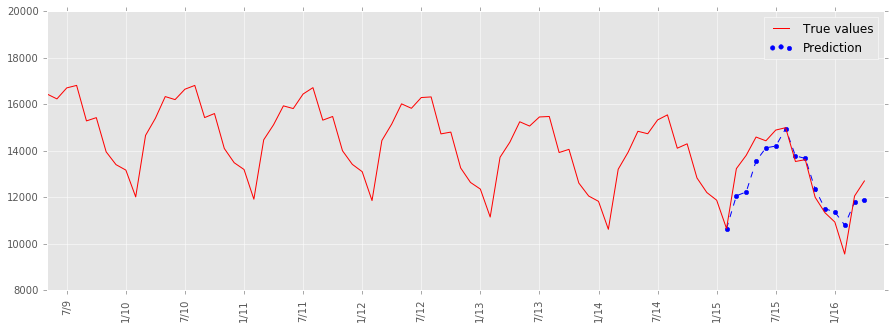

In [105]:
plt.figure(figsize=(15,5))
plt.scatter(range(109,124),predicted_ts,color = 'b',label = 'Prediction')
plt.plot(range(109,124),predicted_ts,color = 'b',linestyle='--',linewidth=1)
plt.plot(range(6,124),ts,color = 'r',label='True values')
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');
plt.xlim(40,125)
plt.legend(loc='best')

On avait prevu d'apprendre les résidut

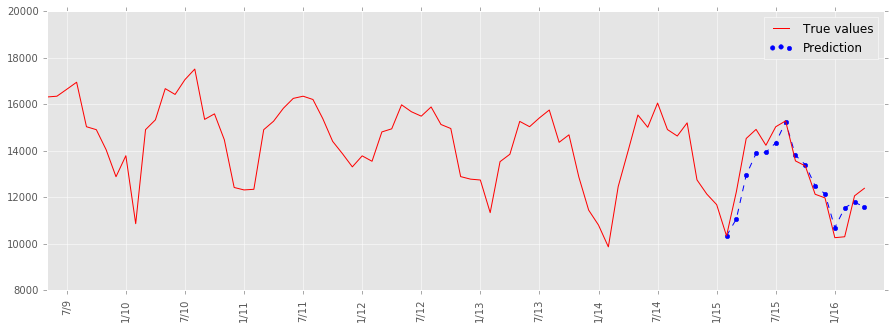

In [21]:
ts_residuals = np.array(df['residuals'])[6:124]

plt.figure(figsize=(15,5))
plt.scatter(range(109,124),predicted_ts+ts_residuals[103:118],color = 'b',label = 'Prediction')
plt.plot(range(109,124),predicted_ts+ts_residuals[103:118],color = 'b',linestyle='--',linewidth=1)
plt.plot(range(6,124),ts+ts_residuals,color = 'r',label='True values')
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');
plt.xlim(40,125)
plt.legend(loc='best')

Avec les résiduts dans le model

C:\Users\Jean-Baptiste\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


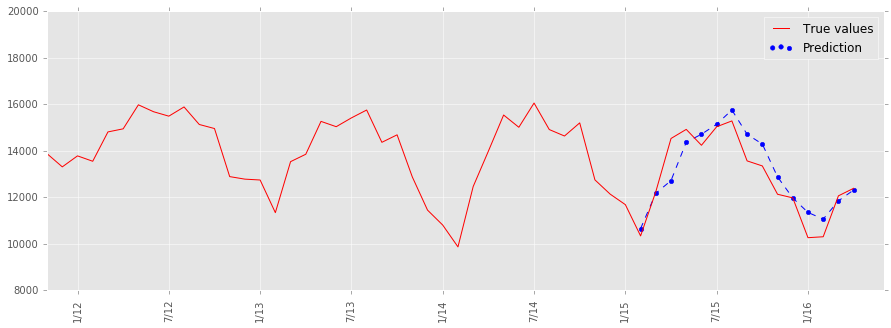

In [88]:
model = ARIMA(ts+ts_residuals, order=(9, 1, 1))  
results = model.fit(disp =-1) 
pred = results.predict(start=104, end = 117, dynamic=True)
prediction = pred.cumsum()
predicted_ts = np.concatenate((ts[103].reshape(1,),prediction+ts[103]))

plt.figure(figsize=(15,5))
plt.scatter(range(109,124),predicted_ts,color = 'b',label = 'Prediction')
plt.plot(range(109,124),predicted_ts,color = 'b',linestyle='--',linewidth=1)
plt.plot(range(6,124),ts+ts_residuals,color = 'r',label='True values')
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');
plt.xlim(70,125)
plt.legend(loc='best')

### Creation d'une fonction de cout

In [161]:
def cost(pred,true):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    cost = np.sqrt((pred-true)*(pred-true))
    ax[0].plot(cost,color = 'r', linewidth= 2)
    ax[0].set_title('Perte par moi')
    cost = cost.cumsum()
    ax[1].plot(cost,color = 'r', linewidth= 2)
    ax[1].fill_between(range(0,np.shape(cost)[0]), 0, cost,hatch = '///')
    ax[1].set_title('Perte cumulée')

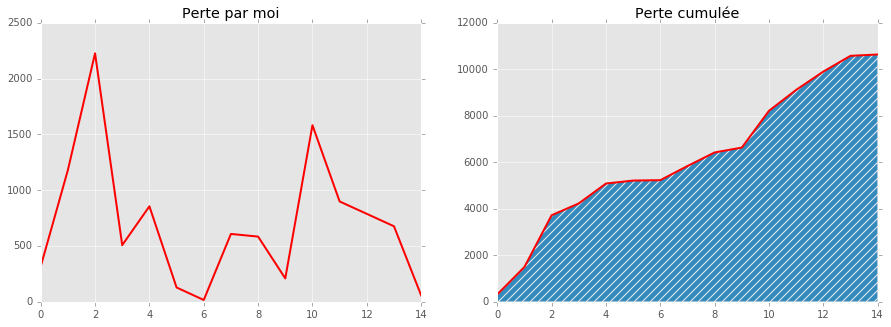

In [125]:
cost(predicted_ts,ts[103:118]+ts_residuals[103:118])

## Machine Learning

### Dans un premier temps regardons les résultats avec une simple random forest

In [195]:
# création des variables à inclure dans le model

df['Crimes_Diff_1'] = df.Crimes.diff(periods=1)

df['Unemployment_Rate_Diff_1'] = df['Unemployment Rate'].diff(periods=1)

for i in range(1,13):
    df['Crimes_lagged_'+str(i)] = df.Crimes.shift(periods=i)
for i in range(1,13):
    df['Crimes_Diff_1_lagged_'+str(i)] = df.Crimes_Diff_1.shift(periods=i)
for i in range(5,15):
    df['Unemployement_rate_lagged_'+str(i)] = df['Unemployment Rate'].shift(periods=i)
for i in range(5,15):
    df['Unemployement_rate_Diff_1_lagged_'+str(i)] = df['Unemployment_Rate_Diff_1'].shift(periods=i)
df['EDU_Diff_1_lagged_'+str(6)] = df['Education_and_Health_Services'].shift(6)

In [85]:
#Model
from sklearn.ensemble import RandomForestRegressor

In [668]:
df.columns

Index(['Other Assaults', 'All Other Offenses', 'Assault', 'Theft', 'Burglary',
       'Order', 'Arson', 'Fraud', 'Robbery', 'Vagrancy/Loitering', 'Rape',
       'Other Sex Offenses (Not Commercialized)', 'Homicide', 'Crimes',
       'Mining_Logging_Construction', 'Manufacturing',
       'Trade_Transportation_Utilities', 'Information', 'Financial_Activities',
       'Professional_and_Business_Services', 'Education_and_Health_Services',
       'Leisure_and_Hospitality', 'Other_Services', 'Government',
       'Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate',
       'trend', 'seasonal', 'residuals', 'Crimes_clean', 'Crimes_clean_Diff_1',
       'Crimes_Diff_1', 'Unemployment_Rate_Diff_1', 'Crimes_lagged_1',
       'Crimes_lagged_2', 'Crimes_lagged_3', 'Crimes_lagged_4',
       'Crimes_lagged_5', 'Crimes_lagged_6', 'Crimes_lagged_7',
       'Crimes_lagged_8', 'Crimes_lagged_9', 'Crimes_lagged_10',
       'Crimes_lagged_11', 'Crimes_lagged_12', 'Crimes_Diff_1_lagged_1',
     

C:\Users\Jean-Baptiste\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


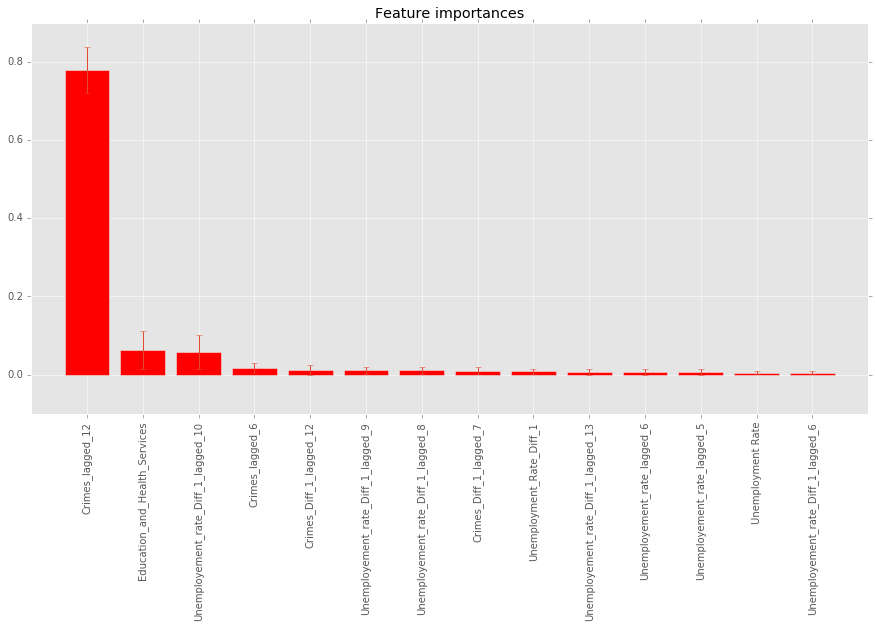

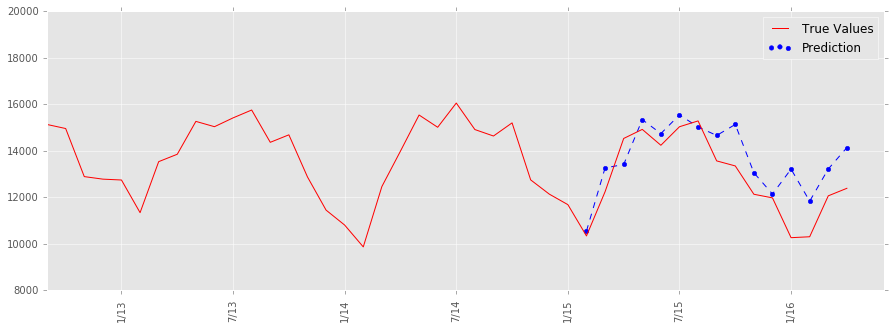

In [197]:
X = np.array(df[['Education_and_Health_Services', 'Unemployment Rate',
       'Crimes_lagged_6','Crimes_lagged_12', 'Crimes_Diff_1_lagged_12','Crimes_Diff_1_lagged_7'
                 , 'Unemployement_rate_lagged_5',
       'Unemployement_rate_lagged_6', 'Unemployment_Rate_Diff_1',
       'Unemployement_rate_Diff_1_lagged_6',
       'Unemployement_rate_Diff_1_lagged_8',
       'Unemployement_rate_Diff_1_lagged_9',
       'Unemployement_rate_Diff_1_lagged_10',
       'Unemployement_rate_Diff_1_lagged_13']])

features_names = ['Education_and_Health_Services', 'Unemployment Rate',
        'Crimes_lagged_6','Crimes_lagged_12','Crimes_Diff_1_lagged_12','Crimes_Diff_1_lagged_7',
       'Unemployement_rate_lagged_5',
       'Unemployement_rate_lagged_6', 'Unemployment_Rate_Diff_1',
       'Unemployement_rate_Diff_1_lagged_6',
       'Unemployement_rate_Diff_1_lagged_8',
       'Unemployement_rate_Diff_1_lagged_9',
       'Unemployement_rate_Diff_1_lagged_10',
       'Unemployement_rate_Diff_1_lagged_13']

Y = np.array(df.Crimes)

X_train = X[16:110]
Y_train = Y[16:110]
X_test = X[109:124]
Y_test = Y[109:124]

RandomForest = RandomForestRegressor(n_estimators=10,min_samples_split=2,oob_score = True)
RandomForest.fit(X_train,Y_train)

importances = RandomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in RandomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(15,7))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [features_names[i] for i in indices],rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

Y_pred = RandomForest.predict(X_test)

plt.figure(figsize=(15,5))
plt.plot(range(109,124),Y_pred,color='b',linestyle='--',linewidth= 1)
plt.scatter(range(109,124),Y_pred,color='b',label='Prediction')
plt.plot(range(16,124),Y[16:124],color='r',label='True Values')
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');
plt.xlim(80,125)
plt.legend(loc='best')

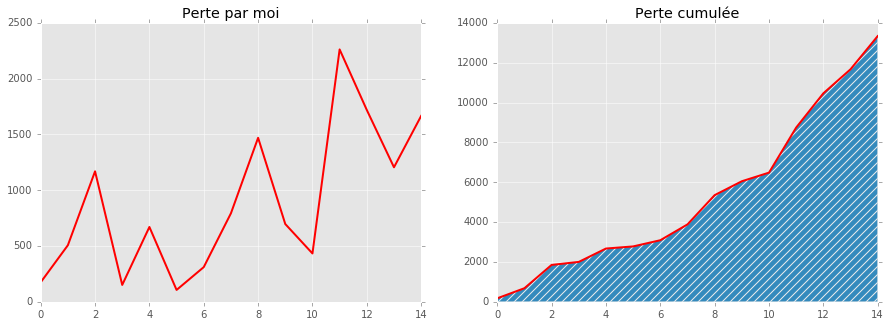

In [162]:
cost(Y_pred,Y[109:124])

#On constate une très bonne performance à court terme comparé a l'ARIMA
#Mais ca semble moins bon à long terme

## SVR

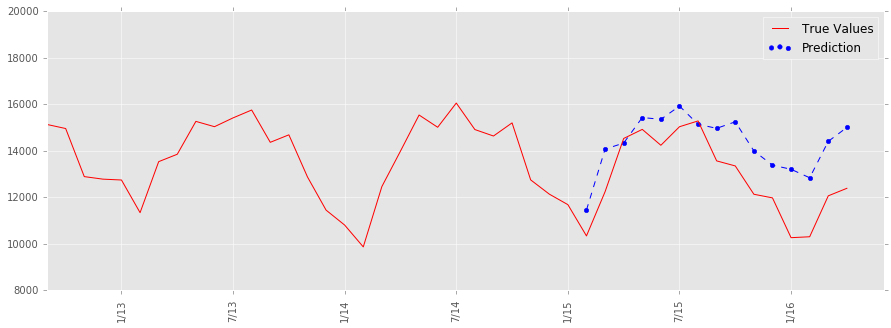

In [163]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = np.array(df[['Education_and_Health_Services', 'Unemployment Rate',
       'Crimes_lagged_6','Crimes_lagged_12', 'Crimes_Diff_1_lagged_12','Crimes_Diff_1_lagged_7'
                 , 'Unemployement_rate_lagged_5',
       'Unemployement_rate_lagged_6', 'Unemployment_Rate_Diff_1']])

Y = np.array(df.Crimes)
Mean = Y.mean()
Std = Y.std()
Y = (Y-Y.mean())/Y.std()

X_train = X[16:110]
Y_train = Y[16:110]
X_test = X[109:124]
Y_test = Y[109:124]

Scaler = StandardScaler()
Svr = svm.SVR()
Regressor = Pipeline([('Scaler', Scaler),('Svr',Svr)])

Regressor.fit(X_train,Y_train)

Y_pred = Regressor.predict(X_test)

Y = Y*Std+Mean
Y_pred = Y_pred*Std+Mean
plt.figure(figsize=(15,5))
plt.plot(range(109,124),Y_pred,color='b',linestyle='--',linewidth= 1)
plt.scatter(range(109,124),Y_pred,color='b',label='Prediction')
plt.plot(range(16,124),Y[16:124],color='r',label='True Values')
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');
plt.xlim(80,125)
plt.legend(loc='best')

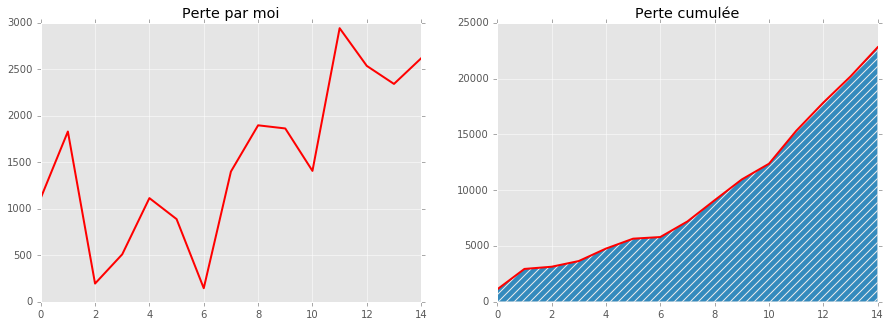

In [164]:
cost(Y_pred,Y[109:124])

## Séparation de Trend, Seasonality et Residuals

### Residuts

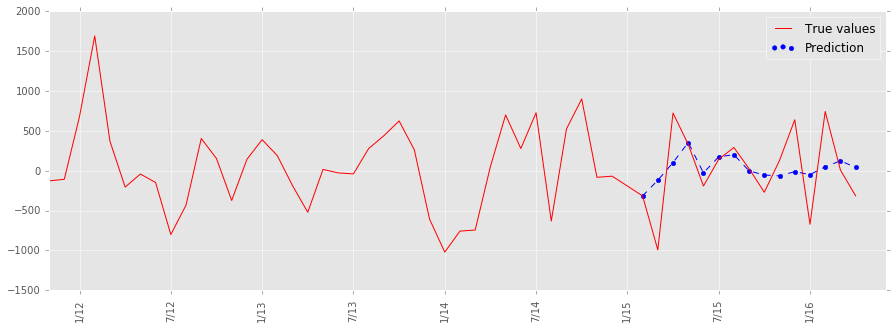

In [671]:
model = ARIMA(ts_residuals, order=(9, 1, 0))  
results = model.fit(disp =-1) 
pred = results.predict(start=104, end = 117, dynamic=True)
prediction = pred.cumsum()
predicted_ts = np.concatenate((ts_residuals[103].reshape(1,),prediction+ts_residuals[103]))

plt.figure(figsize=(15,5))
plt.scatter(range(109,124),predicted_ts,color = 'b',label = 'Prediction')
plt.plot(range(109,124),predicted_ts,color = 'b',linestyle='--',linewidth=1)
plt.plot(range(6,124),ts_residuals,color = 'r',label='True values')
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');
plt.xlim(70,125)
plt.legend(loc='best')

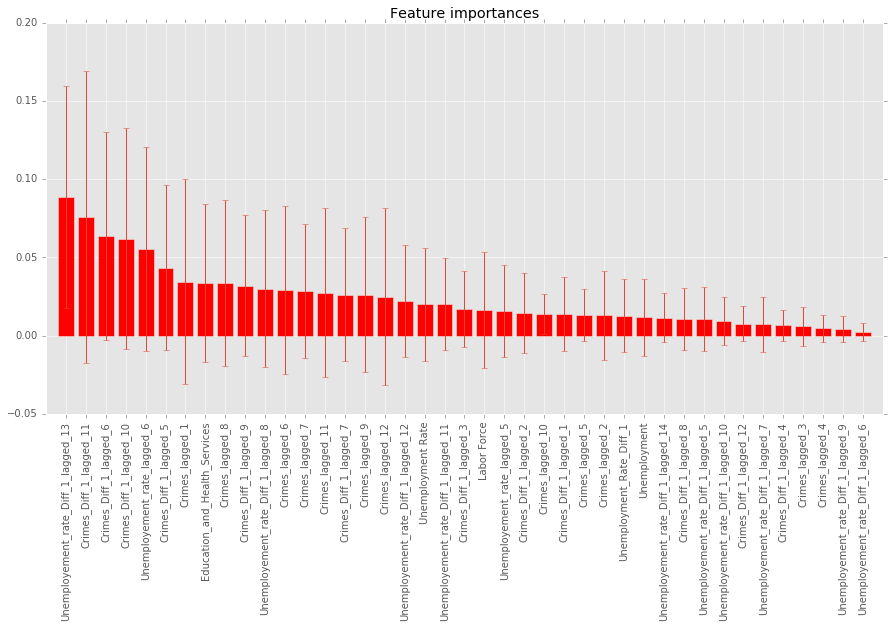

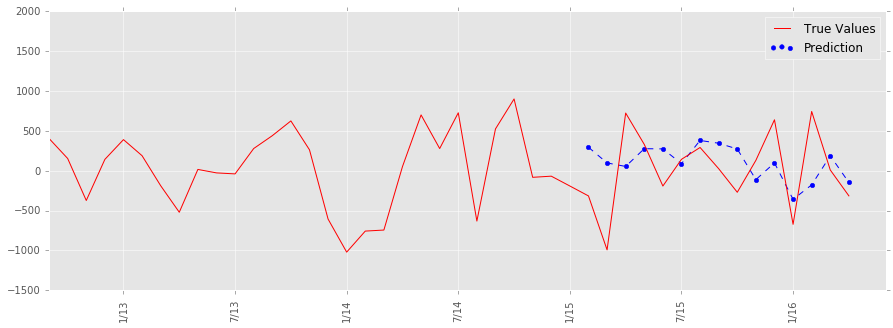

In [672]:
X = np.array(df[['Education_and_Health_Services','Labor Force', 'Unemployment', 'Unemployment Rate',
        'Crimes_lagged_1', 'Crimes_lagged_2',
       'Crimes_lagged_3', 'Crimes_lagged_4', 'Crimes_lagged_5',
       'Crimes_lagged_6', 'Crimes_lagged_7', 'Crimes_lagged_8',
       'Crimes_lagged_9', 'Crimes_lagged_10', 'Crimes_lagged_11',
       'Crimes_lagged_12', 'Crimes_Diff_1_lagged_1',
       'Crimes_Diff_1_lagged_2', 'Crimes_Diff_1_lagged_3',
       'Crimes_Diff_1_lagged_4', 'Crimes_Diff_1_lagged_5',
       'Crimes_Diff_1_lagged_6', 'Crimes_Diff_1_lagged_7',
       'Crimes_Diff_1_lagged_8', 'Crimes_Diff_1_lagged_9',
       'Crimes_Diff_1_lagged_10', 'Crimes_Diff_1_lagged_11',
       'Crimes_Diff_1_lagged_12', 'Unemployement_rate_lagged_5',
       'Unemployement_rate_lagged_6', 'Unemployment_Rate_Diff_1',
       'Unemployement_rate_Diff_1_lagged_5',
       'Unemployement_rate_Diff_1_lagged_6',
       'Unemployement_rate_Diff_1_lagged_7',
       'Unemployement_rate_Diff_1_lagged_8',
       'Unemployement_rate_Diff_1_lagged_9',
       'Unemployement_rate_Diff_1_lagged_10',
       'Unemployement_rate_Diff_1_lagged_11',
       'Unemployement_rate_Diff_1_lagged_12',
       'Unemployement_rate_Diff_1_lagged_13',
       'Unemployement_rate_Diff_1_lagged_14']])[16:124]

features_names = ['Education_and_Health_Services','Labor Force', 'Unemployment', 'Unemployment Rate',
        'Crimes_lagged_1', 'Crimes_lagged_2',
       'Crimes_lagged_3', 'Crimes_lagged_4', 'Crimes_lagged_5',
       'Crimes_lagged_6', 'Crimes_lagged_7', 'Crimes_lagged_8',
       'Crimes_lagged_9', 'Crimes_lagged_10', 'Crimes_lagged_11',
       'Crimes_lagged_12', 'Crimes_Diff_1_lagged_1',
       'Crimes_Diff_1_lagged_2', 'Crimes_Diff_1_lagged_3',
       'Crimes_Diff_1_lagged_4', 'Crimes_Diff_1_lagged_5',
       'Crimes_Diff_1_lagged_6', 'Crimes_Diff_1_lagged_7',
       'Crimes_Diff_1_lagged_8', 'Crimes_Diff_1_lagged_9',
       'Crimes_Diff_1_lagged_10', 'Crimes_Diff_1_lagged_11',
       'Crimes_Diff_1_lagged_12', 'Unemployement_rate_lagged_5',
       'Unemployement_rate_lagged_6', 'Unemployment_Rate_Diff_1',
       'Unemployement_rate_Diff_1_lagged_5',
       'Unemployement_rate_Diff_1_lagged_6',
       'Unemployement_rate_Diff_1_lagged_7',
       'Unemployement_rate_Diff_1_lagged_8',
       'Unemployement_rate_Diff_1_lagged_9',
       'Unemployement_rate_Diff_1_lagged_10',
       'Unemployement_rate_Diff_1_lagged_11',
       'Unemployement_rate_Diff_1_lagged_12',
       'Unemployement_rate_Diff_1_lagged_13',
       'Unemployement_rate_Diff_1_lagged_14']

Y = df.residuals[16:124]

X_train = X[0:94]
Y_train = Y[0:94]
X_test = X[93:108]
Y_test = Y[93:108]

RandomForest = RandomForestRegressor()
RandomForest.fit(X_train,Y_train)

Y_pred = RandomForest.predict(X_test)

importances = RandomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in RandomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(15,7))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [features_names[i] for i in indices],rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

plt.figure(figsize=(15,5))
plt.plot(range(109,124),Y_pred,color='b',linestyle='--',linewidth= 1)
plt.scatter(range(109,124),Y_pred,color='b',label='Prediction')
plt.plot(range(16,124),Y,color='r',label='True Values')
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');
plt.xlim(80,125)
plt.legend(loc='best')



In [673]:
X_train

array([[  1.92000000e+05,   6.14604000e+05,   3.69470000e+04, ...,
          4.00000000e-01,  -4.00000000e-01,  -2.00000000e-01],
       [  1.86400000e+05,   6.22894000e+05,   3.94930000e+04, ...,
          3.00000000e-01,   4.00000000e-01,  -4.00000000e-01],
       [  1.87100000e+05,   6.32765000e+05,   4.16610000e+04, ...,
          3.00000000e-01,   3.00000000e-01,   4.00000000e-01],
       ..., 
       [  2.17100000e+05,   6.86829000e+05,   4.58750000e+04, ...,
         -7.00000000e-01,  -9.00000000e-01,   1.00000000e-01],
       [  2.13900000e+05,   6.93722000e+05,   5.41040000e+04, ...,
          7.00000000e-01,  -7.00000000e-01,  -9.00000000e-01],
       [  2.20300000e+05,   6.94363000e+05,   5.08790000e+04, ...,
         -2.00000000e-01,   7.00000000e-01,  -7.00000000e-01]])

In [674]:
df1 = pd.read_csv('E:\\ENSAE\\python\\Projet ML\\Philadelphia\\totalpop_povertyrate.csv', index_col=0)
df1 = df1.drop([130,131],axis=0)
df1.head()

,Total population,Poverty rate
0,1488710.00,25.100000
1,1489093.25,24.991667
2,1489476.50,24.883333
3,1489859.75,24.775000
4,1490243.00,24.666667


In [675]:
df = pd.concat([df,df1],axis=1)
df.head()

,Other Assaults,All Other Offenses,Assault,Theft,Burglary,Order,Arson,Fraud,Robbery,Vagrancy/Loitering,Rape,Other Sex Offenses (Not Commercialized),Homicide,Crimes,Mining_Logging_Construction,Manufacturing,Trade_Transportation_Utilities,Information,Financial_Activities,Professional_and_Business_Services,Education_and_Health_Services,Leisure_and_Hospitality,Other_Services,Government,Labor Force,Employment,Unemployment,Unemployment Rate,trend,seasonal,residuals,Crimes_clean,Crimes_clean_Diff_1,Crimes_Diff_1,Unemployment_Rate_Diff_1,Crimes_lagged_1,Crimes_lagged_2,Crimes_lagged_3,Crimes_lagged_4,Crimes_lagged_5,Crimes_lagged_6,Crimes_lagged_7,Crimes_lagged_8,Crimes_lagged_9,Crimes_lagged_10,Crimes_lagged_11,Crimes_lagged_12,Crimes_Diff_1_lagged_1,Crimes_Diff_1_lagged_2,Crimes_Diff_1_lagged_3,Crimes_Diff_1_lagged_4,Crimes_Diff_1_lagged_5,Crimes_Diff_1_lagged_6,Crimes_Diff_1_lagged_7,Crimes_Diff_1_lagged_8,Crimes_Diff_1_lagged_9,Crimes_Diff_1_lagged_10,Crimes_Diff_1_lagged_11,Crimes_Diff_1_lagged_12,Unemployement_rate_lagged_5,Unemployement_rate_lagged_6,Unemployement_rate_lagged_7,Unemployement_rate_lagged_8,Unemployement_rate_lagged_9,Unemployement_rate_lagged_10,Unemployement_rate_lagged_11,Unemployement_rate_lagged_12,Unemployement_rate_lagged_13,Unemployement_rate_lagged_14,Unemployement_rate_Diff_1_lagged_5,Unemployement_rate_Diff_1_lagged_6,Unemployement_rate_Diff_1_lagged_7,Unemployement_rate_Diff_1_lagged_8,Unemployement_rate_Diff_1_lagged_9,Unemployement_rate_Diff_1_lagged_10,Unemployement_rate_Diff_1_lagged_11,Unemployement_rate_Diff_1_lagged_12,Unemployement_rate_Diff_1_lagged_13,Unemployement_rate_Diff_1_lagged_14,Total population,Poverty rate
0,2173,4295,2895,3696,908,2204,44,1924,890,55,96,154,25,17086,11800,30400,88400,12700,47700,82600,182800,54500,28100,113900,608659,568770,39889,6.6,NaN,-1718.850309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1488710.00,25.100000
1,1853,3430,2395,2999,674,1966,40,1607,659,46,61,142,22,13998,12000,30400,87400,13300,47600,83100,191000,55000,28100,115100,609180,570129,39051,6.4,NaN,-2912.329475,NaN,NaN,NaN,-3088.0,-0.2,17086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489093.25,24.991667
2,2459,3706,3025,3551,842,2225,51,1698,776,51,78,131,34,16618,12100,30400,87800,12600,47400,83000,188000,55900,28300,115200,609354,571811,37543,6.2,NaN,-305.637809,NaN,NaN,NaN,2620.0,-0.2,13998.0,17086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489476.50,24.883333
3,2343,4422,2904,3447,781,2184,55,1672,816,43,92,143,38,16935,12300,30400,87900,12700,47500,83600,190900,58100,28400,116300,610997,575352,35645,5.8,NaN,389.603858,NaN,NaN,NaN,317.0,-0.4,16618.0,13998.0,17086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2620.0,-3088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489859.75,24.775000
4,2500,3734,3389,4138,1001,2091,68,1892,907,38,87,165,31,17791,13500,30300,88400,12900,47600,83500,187600,59000,28500,115600,613592,575646,37946,6.2,NaN,1277.330247,NaN,NaN,NaN,856.0,0.4,16935.0,16618.0,13998.0,17086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.0,2620.0,-3088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490243.00,24.666667


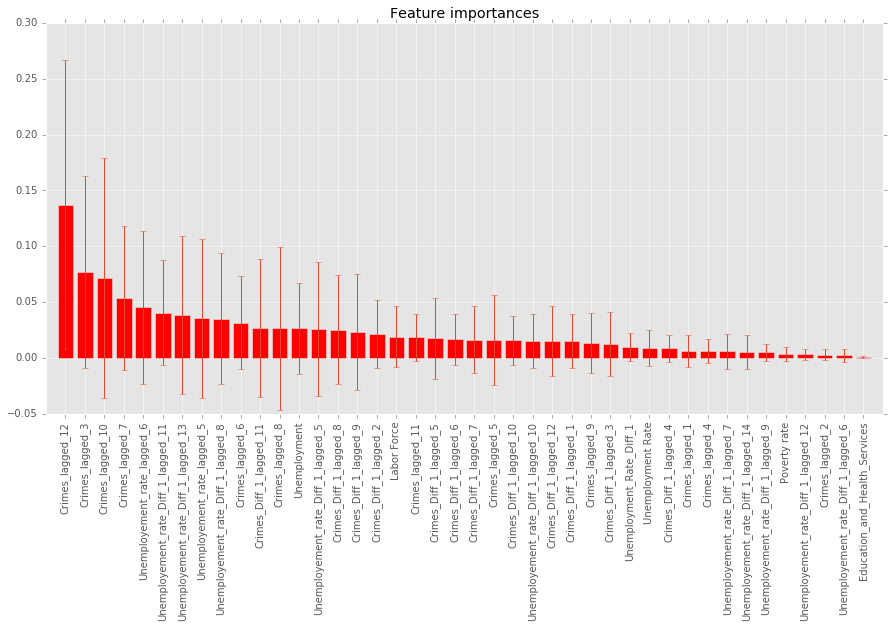

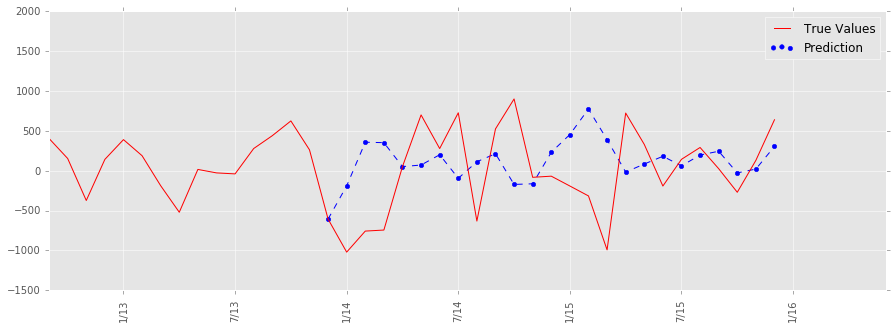

In [676]:
X = np.array(df[['Poverty rate','Education_and_Health_Services','Labor Force', 'Unemployment', 'Unemployment Rate',
        'Crimes_lagged_1', 'Crimes_lagged_2',
       'Crimes_lagged_3', 'Crimes_lagged_4', 'Crimes_lagged_5',
       'Crimes_lagged_6', 'Crimes_lagged_7', 'Crimes_lagged_8',
       'Crimes_lagged_9', 'Crimes_lagged_10', 'Crimes_lagged_11',
       'Crimes_lagged_12', 'Crimes_Diff_1_lagged_1',
       'Crimes_Diff_1_lagged_2', 'Crimes_Diff_1_lagged_3',
       'Crimes_Diff_1_lagged_4', 'Crimes_Diff_1_lagged_5',
       'Crimes_Diff_1_lagged_6', 'Crimes_Diff_1_lagged_7',
       'Crimes_Diff_1_lagged_8', 'Crimes_Diff_1_lagged_9',
       'Crimes_Diff_1_lagged_10', 'Crimes_Diff_1_lagged_11',
       'Crimes_Diff_1_lagged_12', 'Unemployement_rate_lagged_5',
       'Unemployement_rate_lagged_6', 'Unemployment_Rate_Diff_1',
       'Unemployement_rate_Diff_1_lagged_5',
       'Unemployement_rate_Diff_1_lagged_6',
       'Unemployement_rate_Diff_1_lagged_7',
       'Unemployement_rate_Diff_1_lagged_8',
       'Unemployement_rate_Diff_1_lagged_9',
       'Unemployement_rate_Diff_1_lagged_10',
       'Unemployement_rate_Diff_1_lagged_11',
       'Unemployement_rate_Diff_1_lagged_12',
       'Unemployement_rate_Diff_1_lagged_13',
       'Unemployement_rate_Diff_1_lagged_14']])[16:124]

features_names = ['Poverty rate','Education_and_Health_Services','Labor Force', 'Unemployment', 'Unemployment Rate',
        'Crimes_lagged_1', 'Crimes_lagged_2',
       'Crimes_lagged_3', 'Crimes_lagged_4', 'Crimes_lagged_5',
       'Crimes_lagged_6', 'Crimes_lagged_7', 'Crimes_lagged_8',
       'Crimes_lagged_9', 'Crimes_lagged_10', 'Crimes_lagged_11',
       'Crimes_lagged_12', 'Crimes_Diff_1_lagged_1',
       'Crimes_Diff_1_lagged_2', 'Crimes_Diff_1_lagged_3',
       'Crimes_Diff_1_lagged_4', 'Crimes_Diff_1_lagged_5',
       'Crimes_Diff_1_lagged_6', 'Crimes_Diff_1_lagged_7',
       'Crimes_Diff_1_lagged_8', 'Crimes_Diff_1_lagged_9',
       'Crimes_Diff_1_lagged_10', 'Crimes_Diff_1_lagged_11',
       'Crimes_Diff_1_lagged_12', 'Unemployement_rate_lagged_5',
       'Unemployement_rate_lagged_6', 'Unemployment_Rate_Diff_1',
       'Unemployement_rate_Diff_1_lagged_5',
       'Unemployement_rate_Diff_1_lagged_6',
       'Unemployement_rate_Diff_1_lagged_7',
       'Unemployement_rate_Diff_1_lagged_8',
       'Unemployement_rate_Diff_1_lagged_9',
       'Unemployement_rate_Diff_1_lagged_10',
       'Unemployement_rate_Diff_1_lagged_11',
       'Unemployement_rate_Diff_1_lagged_12',
       'Unemployement_rate_Diff_1_lagged_13',
       'Unemployement_rate_Diff_1_lagged_14']

Y = df.residuals[16:120]

X_train = X[0:80]
Y_train = Y[0:80]
X_test = X[79:104]
Y_test = Y[79:104]

RandomForest = RandomForestRegressor()
RandomForest.fit(X_train,Y_train)

Y_pred = RandomForest.predict(X_test)

importances = RandomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in RandomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(15,7))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [features_names[i] for i in indices],rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

plt.figure(figsize=(15,5))
plt.plot(range(95,120),Y_pred,color='b',linestyle='--',linewidth= 1)
plt.scatter(range(95,120),Y_pred,color='b',label='Prediction')
plt.plot(range(16,120),Y,color='r',label='True Values')
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');
plt.xlim(80,125)
plt.legend(loc='best')


### Prediction de la trend

In [677]:
for i in range(6,18):
    df['Education_and_Health_Services_lagged_'+str(i)] = df.Education_and_Health_Services.shift(periods=i)
for i in range(6,18):
    df['Government_lagged_'+str(i)] = df.Government.shift(periods=i)
df['Pop_Active'] = df['Labor Force']/df['Total population']

decomposition = seasonal_decompose(np.array(df['Labor Force']),freq=12)
df['Labor_trend'] =  decomposition.trend
df['Pop_Active'] = df['Labor_trend']/df['Total population']

df['Poverty rate_Diff'] = df['Poverty rate'].diff(periods=1)
for i in range(6,12):
    df['Poverty rate_Diff_lagged_'+str(i)] = df['Poverty rate_Diff'].shift(periods=i)

E:\Anaconda\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


In [678]:
for i in df.columns:
    print(i)

Other Assaults
All Other Offenses
Assault
Theft
Burglary
Order
Arson
Fraud
Robbery
Vagrancy/Loitering
Rape
Other Sex Offenses (Not Commercialized)
Homicide
Crimes
Mining_Logging_Construction
Manufacturing
Trade_Transportation_Utilities
Information
Financial_Activities
Professional_and_Business_Services
Education_and_Health_Services
Leisure_and_Hospitality
Other_Services
Government
Labor Force
Employment
Unemployment
Unemployment Rate
trend
seasonal
residuals
Crimes_clean
Crimes_clean_Diff_1
Crimes_Diff_1
Unemployment_Rate_Diff_1
Crimes_lagged_1
Crimes_lagged_2
Crimes_lagged_3
Crimes_lagged_4
Crimes_lagged_5
Crimes_lagged_6
Crimes_lagged_7
Crimes_lagged_8
Crimes_lagged_9
Crimes_lagged_10
Crimes_lagged_11
Crimes_lagged_12
Crimes_Diff_1_lagged_1
Crimes_Diff_1_lagged_2
Crimes_Diff_1_lagged_3
Crimes_Diff_1_lagged_4
Crimes_Diff_1_lagged_5
Crimes_Diff_1_lagged_6
Crimes_Diff_1_lagged_7
Crimes_Diff_1_lagged_8
Crimes_Diff_1_lagged_9
Crimes_Diff_1_lagged_10
Crimes_Diff_1_lagged_11
Crimes_Diff_1_l

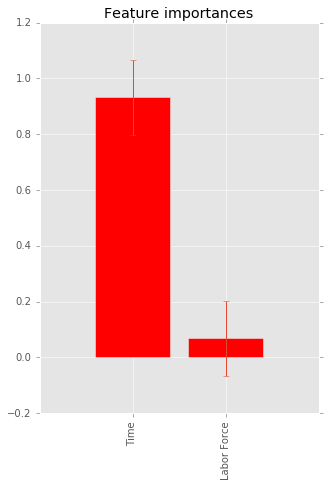

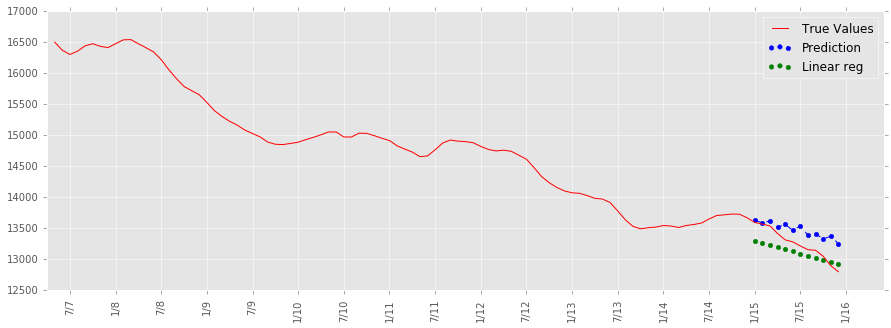

In [93]:
X = np.array(df[['Labor Force']])[16:124]

features_names = ['Labor Force','Time']

X= np.concatenate((X,np.array([i for i in range(16,124)]).reshape(108,1)),axis=1)
Y = df.trend[16:120]

X_train = X[0:93]
Y_train = Y[0:93]
X_test = X[92:104]
Y_test = Y[92:104]

RandomForest = RandomForestRegressor(n_estimators=100)
RandomForest.fit(X_train,Y_train)

Y_pred = RandomForest.predict(X_test)

importances = RandomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in RandomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(5,7))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [features_names[i] for i in indices],rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

from sklearn.linear_model import LinearRegression

LineReg = LinearRegression(fit_intercept=True)
X_2 = np.array([i for i in range(12,108)]).reshape(96,1)
Y_2 = np.array(df.trend[12:108])
Y_2 = Y_2.reshape((96,1))
LineReg.fit(X_2,Y_2)

pente = float(LineReg.predict(X_2)[1]-LineReg.predict(X_2)[0])
Y_pred_2 = [Y_pred[i]+i*pente for i in range(0,np.shape(Y_pred)[0])]
Y_pred_3 = LineReg.predict(np.array([i for i in range(108,120)]).reshape(12,1))

plt.figure(figsize=(15,5))
plt.plot(range(108,120),Y_pred_2,color='b',linestyle='--',linewidth= 1)
plt.scatter(range(108,120),Y_pred_2,color='b',label='Prediction')
plt.scatter(range(108,120),Y_pred_3,color='g',label='Linear reg')
plt.plot(range(16,120),Y,color='r',label='True Values')
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');
plt.xlim(15,125)
plt.legend(loc='best')

### Seasonal + residuts

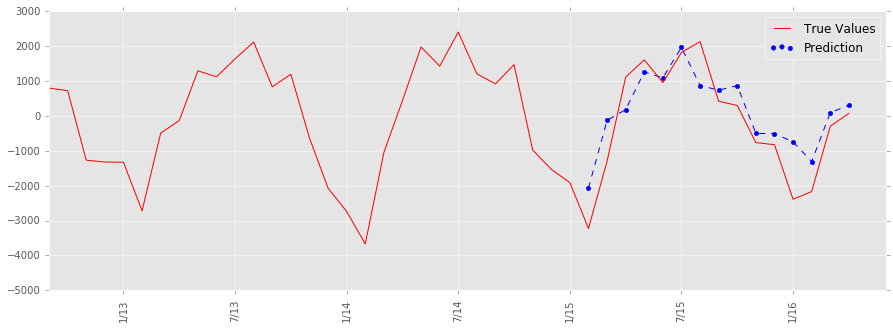

In [187]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = np.array(df[['Education_and_Health_Services', 'Unemployment Rate',
       'Crimes_lagged_6','Crimes_lagged_12', 'Crimes_Diff_1_lagged_12','Crimes_Diff_1_lagged_7'
                 , 'Unemployement_rate_lagged_5',
       'Unemployement_rate_lagged_6', 'Unemployment_Rate_Diff_1']])

#X= np.concatenate((X,np.array([i for i in range(0,130)]).reshape(130,1)),axis=1)

Y = np.array(df.Crimes-df.trend)
STD=Y[16:110].std()
Y=Y/STD

X_train = X[16:110]
Y_train = Y[16:110]
X_test = X[109:124]
Y_test = Y[109:124]

Scaler = StandardScaler()
Svr = svm.SVR()
Regressor = Pipeline([('Scaler', Scaler),('Svr',Svr)])

Regressor.fit(X_train,Y_train)

Y_pred = Regressor.predict(X_test)

Y=Y*STD
Y_pred=Y_pred*STD
plt.figure(figsize=(15,5))
plt.plot(range(109,124),Y_pred,color='b',linestyle='--',linewidth= 1)
plt.scatter(range(109,124),Y_pred,color='b',label='Prediction')
plt.plot(range(16,124),Y[16:124],color='r',label='True Values')
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');
plt.xlim(80,125)
plt.legend(loc='best')

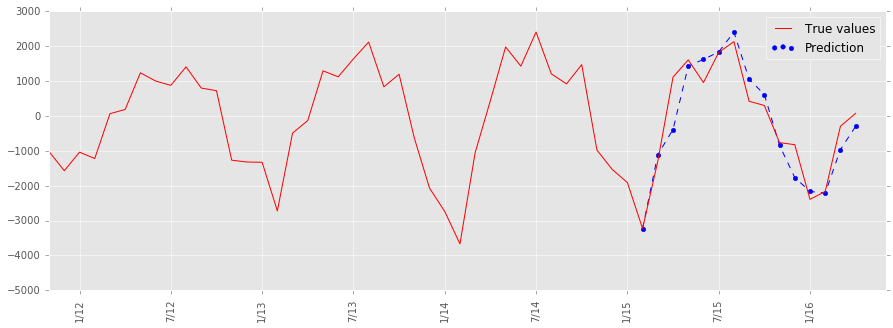

In [106]:
ts = np.array(df.Crimes-df.trend)[6:124]

model = ARIMA(ts, order=(9, 1, 1))  
results = model.fit(disp =-1) 
pred = results.predict(start=104, end = 117, dynamic=True)
prediction = pred.cumsum()
predicted_ts = np.concatenate((ts[103].reshape(1,),prediction+ts[103]))

plt.figure(figsize=(15,5))
plt.scatter(range(109,124),predicted_ts,color = 'b',label = 'Prediction')
plt.plot(range(109,124),predicted_ts,color = 'b',linestyle='--',linewidth=1)
plt.plot(range(6,124),ts,color = 'r',label='True values')
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');
plt.xlim(70,125)
plt.legend(loc='best')

### Combiné

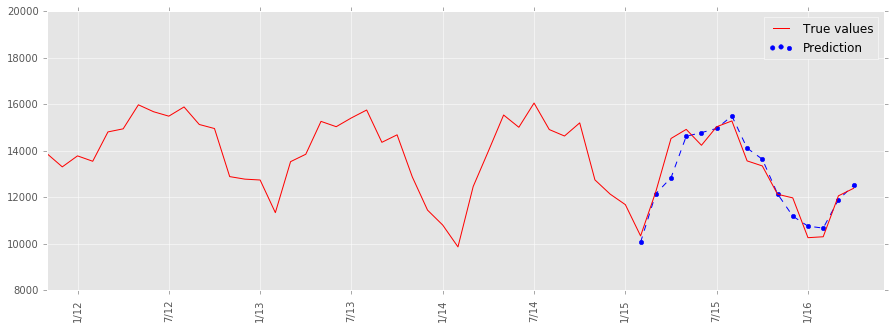

In [107]:
Y_pred_4 = LineReg.predict(np.array([i for i in range(108,123)]).reshape(15,1))

plt.figure(figsize=(15,5))
plt.scatter(range(109,124),predicted_ts+Y_pred_4.reshape(15,),color = 'b',label = 'Prediction')
plt.plot(range(109,124),predicted_ts+Y_pred_4.reshape(15,),color = 'b',linestyle='--',linewidth=1)
plt.plot(range(6,124),ts+df.trend[6:124],color = 'r',label='True values')
plt.xticks(range(0,130)[0::6],[Month[i] for i in range(0,130)[0::6]],rotation='vertical');
plt.xlim(70,125)
plt.legend(loc='best')

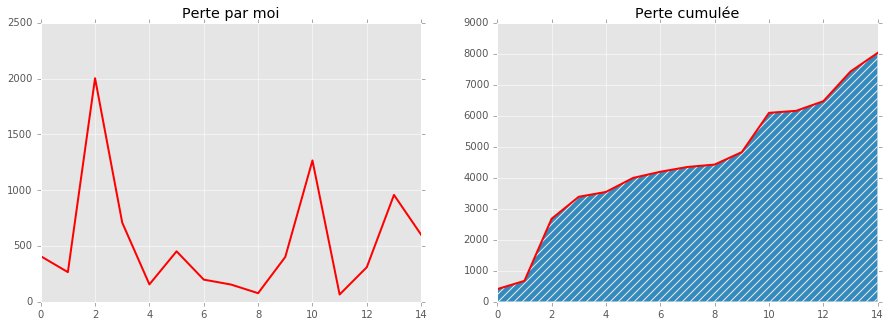

In [145]:
cost(predicted_ts+Y_pred_4.reshape(15,),ts[103:118]+np.array(df.trend[103:118]))

## Comparaison des models sur deux ans 

C:\Users\Jean-Baptiste\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jean-Baptiste\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


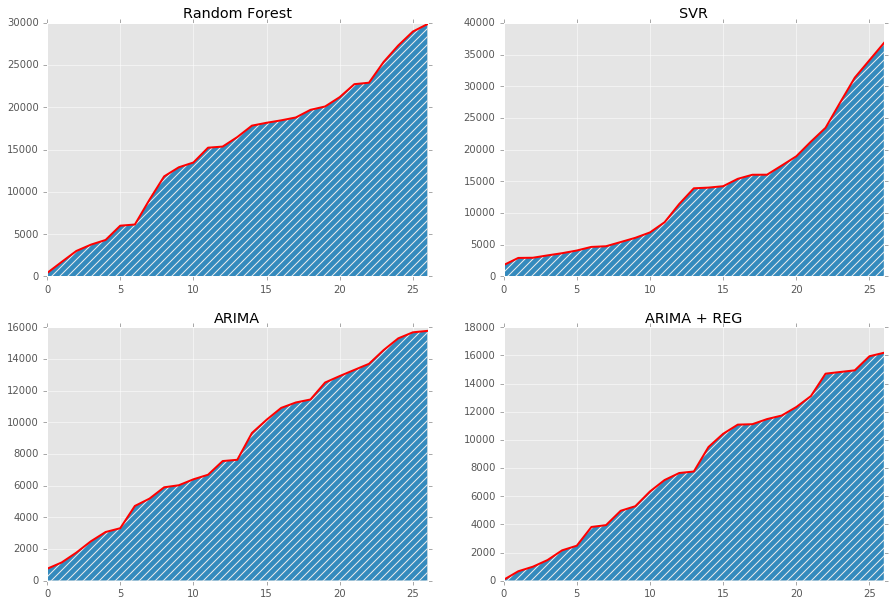

In [172]:
fig,ax = plt.subplots(2,2, figsize = (15,10))

X = np.array(df[['Education_and_Health_Services', 'Unemployment Rate',
       'Crimes_lagged_6','Crimes_lagged_12', 'Crimes_Diff_1_lagged_12','Crimes_Diff_1_lagged_7'
                 , 'Unemployement_rate_lagged_5',
       'Unemployement_rate_lagged_6', 'Unemployment_Rate_Diff_1',
       'Unemployement_rate_Diff_1_lagged_6',
       'Unemployement_rate_Diff_1_lagged_8',
       'Unemployement_rate_Diff_1_lagged_9',
       'Unemployement_rate_Diff_1_lagged_10',
       'Unemployement_rate_Diff_1_lagged_13']])

features_names = ['Education_and_Health_Services', 'Unemployment Rate',
        'Crimes_lagged_6','Crimes_lagged_12','Crimes_Diff_1_lagged_12','Crimes_Diff_1_lagged_7',
       'Unemployement_rate_lagged_5',
       'Unemployement_rate_lagged_6', 'Unemployment_Rate_Diff_1',
       'Unemployement_rate_Diff_1_lagged_6',
       'Unemployement_rate_Diff_1_lagged_8',
       'Unemployement_rate_Diff_1_lagged_9',
       'Unemployement_rate_Diff_1_lagged_10',
       'Unemployement_rate_Diff_1_lagged_13']

Y = np.array(df.Crimes)

X_train = X[16:98]
Y_train = Y[16:98]
X_test = X[97:124]
Y_test = Y[97:124]

RandomForest = RandomForestRegressor(n_estimators=10,min_samples_split=2,oob_score = True)
RandomForest.fit(X_train,Y_train)

importances = RandomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in RandomForest.estimators_],
             axis=0)

pred = RandomForest.predict(X_test)
true = Y[97:124]
cost = np.sqrt((pred-true)*(pred-true))
cost = cost.cumsum()
ax[0][0].plot(cost,color = 'r', linewidth= 2)
ax[0][0].fill_between(range(0,np.shape(cost)[0]), 0, cost,hatch = '///')
ax[0][0].set_title('Random Forest')
ax[0][0].set_xlim(0,26);

X = np.array(df[['Education_and_Health_Services', 'Unemployment Rate',
       'Crimes_lagged_6','Crimes_lagged_12', 'Crimes_Diff_1_lagged_12','Crimes_Diff_1_lagged_7'
                 , 'Unemployement_rate_lagged_5',
       'Unemployement_rate_lagged_6', 'Unemployment_Rate_Diff_1']])

Y = np.array(df.Crimes)
Mean = Y.mean()
Std = Y.std()
Y = (Y-Y.mean())/Y.std()

X_train = X[16:98]
Y_train = Y[16:98]
X_test = X[97:124]
Y_test = Y[97:124]

Scaler = StandardScaler()
Svr = svm.SVR()
Regressor = Pipeline([('Scaler', Scaler),('Svr',Svr)])

Regressor.fit(X_train,Y_train)

Y_pred = Regressor.predict(X_test)
Y = Y*Std+Mean
pred = Y_pred*Std+Mean
true = Y[97:124]
cost = np.sqrt((pred-true)*(pred-true))
cost = cost.cumsum()
ax[0][1].plot(cost,color = 'r', linewidth= 2)
ax[0][1].fill_between(range(0,np.shape(cost)[0]), 0, cost,hatch = '///')
ax[0][1].set_title('SVR')
ax[0][1].set_xlim(0,26);

ts = np.array(df.Crimes_clean.astype(float))[6:124]
ts_residuals = np.array(df['residuals'])[6:124]
model = ARIMA(ts+ts_residuals, order=(9, 1, 1))  
results = model.fit(disp =-1) 
pred = results.predict(start=92, end = 117, dynamic=True)
prediction = pred.cumsum()
pred = np.concatenate((ts[91].reshape(1,),prediction+ts[91]))
true = ts[91:118]+ts_residuals[91:118]
cost = np.sqrt((pred-true)*(pred-true))
cost_1 = cost.cumsum()
ax[1][0].plot(cost_1,color = 'r', linewidth= 2)
ax[1][0].fill_between(range(0,np.shape(cost)[0]), 0, cost_1,hatch = '///')
ax[1][0].set_title('ARIMA')
ax[1][0].set_xlim(0,26);

ts = np.array(df.Crimes-df.trend)[6:124]
model = ARIMA(ts, order=(9, 1, 1))  
results = model.fit(disp =-1) 
pred = results.predict(start=92, end = 117, dynamic=True)
prediction = pred.cumsum()
predicted_ts = np.concatenate((ts[91].reshape(1,),prediction+ts[91]))
Y_pred_4 = LineReg.predict(np.array([i for i in range(96,123)]).reshape(27,1))
pred = predicted_ts+Y_pred_4.reshape(27,)
true = ts[91:118]+np.array(df.trend[91:118])
cost = np.sqrt((pred-true)*(pred-true))
cost = cost.cumsum()
ax[1][1].plot(cost,color = 'r', linewidth= 2)
ax[1][1].fill_between(range(0,np.shape(cost)[0]), 0, cost,hatch = '///')
ax[1][1].set_title('ARIMA + REG')
ax[1][1].set_xlim(0,26);

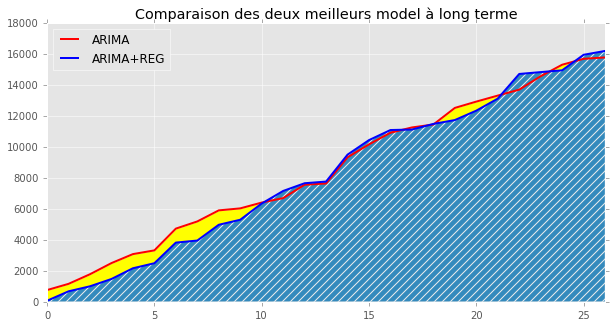

In [182]:
plt.figure(figsize=(10,5))
plt.plot(cost_1,color = 'r', linewidth= 2,label = 'ARIMA')
plt.fill_between(range(0,np.shape(cost_1)[0]), cost_1, cost,
                 facecolor='yellow')
plt.plot(cost,color = 'b', linewidth= 2, label = 'ARIMA+REG')
plt.fill_between(range(0,np.shape(cost)[0]), 0, cost,hatch = '///')
plt.title('Comparaison des deux meilleurs model à long terme')
plt.legend(loc='best')
plt.xlim(0,26);